### Homework Rakamin Trial Class - Mini Case

# Mengukur Performa Penjualan Ritel Online

## Load Data

In [57]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
data = pd.read_csv('online_retail_II.csv')
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [124]:
data.isna().sum().sum()

247389

In [123]:
data.duplicated().sum().sum()

34335

## Section 1

### Create New Feature: Year

In [125]:
# Ubah tipe data kolom InvoiceDate menjadi tipe 'datetime'
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Buat kolom baru 'Year' yang berisi nilai tahun dari kolom InvoiceDate
data['Year'] = pd.DatetimeIndex(data['InvoiceDate']).year
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,30.0


### Filtering Data

In [30]:
# Buat variabel baru dengan ketentuan Quantity tidak boleh 0 dan Invoice tidak mengandung huruf C
sales = data[(data['Quantity'] > 0) & (~data['Invoice'].str.contains('C'))]

### Create New Feature: Revenue

In [31]:
# Buat kolom baru bernama Revenue dengan nilai Quantity dikali dengan Price
data['Revenue'] = data['Quantity'] * data['Price']


### Average of Revenue per Year

In [104]:
# Menghitung rata-rata Revenue per tahun
avg_revenue = data.groupby(data['Year'])['Revenue'].mean().reset_index()

avg_revenue


,Year,Revenue
0,2009,17.684777
1,2010,18.152555
2,2011,18.018195


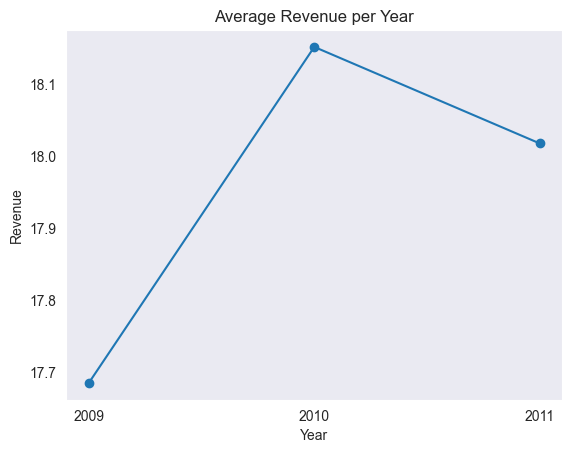

In [107]:
# Mengubah kolom Year menjadi tipe data datetime dengan format '%Y'
avg_revenue['Year'] = pd.to_datetime(avg_revenue['Year'], format='%Y')

# Membuat plot line
plt.plot(avg_revenue['Year'].dt.strftime('%Y'), avg_revenue['Revenue'], marker='o')

# Memberikan judul pada plot dan sumbu x serta y
plt.title('Average Revenue per Year')
plt.xlabel('Year')
plt.ylabel('Revenue')

# Menampilkan plot
plt.show()


### Interpretation

rata-rata revenue tertinggi terjadi pada tahun 2010, di mana kenaikan dari tahun sebelumnya cukup signifikan. sedangkan pada tahun 2011 terjadi sedikit penurunan sehingga perlu diadakan pengujian lebih lanjut penyebab terjadinya penurunan tersebut.

## Section 2

### Filtering Data 

#### Customers who finished their purchases

In [131]:
finished = data[(data['Quantity'] > 0) & data['Customer ID'].notnull() & (~data['Invoice'].str.contains('C'))]
finished.shape

(805620, 10)

#### Customers who canceled their purchases

In [135]:
cancelled = data[data['Customer ID'].notnull() & (data['Invoice'].str.contains('C'))]
cancelled.shape

(18744, 10)

### Number of Finished and Canceled Transactions Each Year

In [136]:
# Mengelompokkan jumlah transaksi yang berhasil dan dibatalkan per tahun
finished_by_year = finished.groupby(finished['Year'])['Invoice'].count()
finished_by_year

Year
2009     30761
2010    403094
2011    371765
Name: Invoice, dtype: int64

In [137]:
cancelled_by_year = cancelled.groupby(cancel['Year'])['Invoice'].count()
cancelled_by_year

Year
2009     999
2010    9530
2011    8215
Name: Invoice, dtype: int64

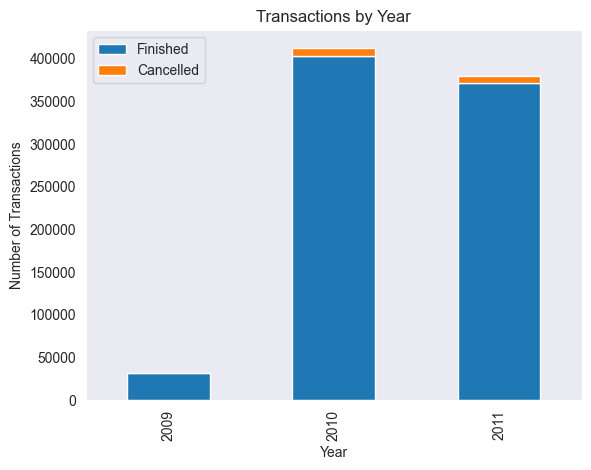

In [138]:
# Menggabungkan jumlah transaksi yang berhasil dan dibatalkan per tahun
transactions_by_year = pd.concat([finished_by_year, cancelled_by_year], axis=1).fillna(0)
transactions_by_year.columns = ['Finished', 'Cancelled']

# Membuat plot stacked bar chart
transactions_by_year.plot(kind='bar', stacked=True)

# Memberikan judul pada plot dan sumbu x serta y
plt.title('Transactions by Year')
plt.xlabel('Year')
plt.ylabel('Number of Transactions')

# Menampilkan plot
plt.show()


### Cancellation Rate

In [139]:
# Menghitung jumlah customer yang melakukan pembatalan dan jumlah seluruh customer per tahun
cancelled_customers_by_year = cancel.groupby(cancel['Year'])['Invoice'].count()
total_customers_by_year = data.groupby(data['Year'])['Invoice'].count()

# Menghitung cancellation rate untuk setiap tahun
cancellation_rate_by_year = (cancelled_customers_by_year / total_customers_by_year) * 100
cancellation_rate_by_year = cancellation_rate_by_year.fillna(0)
cancellation_rate_by_year


Year
2009    2.208809
2010    1.823177
2011    1.644878
Name: Invoice, dtype: float64

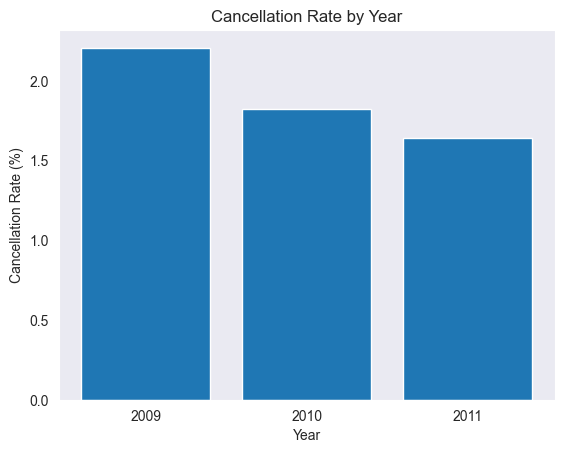

In [140]:
# Membuat plot bar chart
plt.bar(cancellation_rate_by_year.index.astype(str), cancellation_rate_by_year)

# Memberikan judul pada plot dan sumbu x serta y
plt.title('Cancellation Rate by Year')
plt.xlabel('Year')
plt.ylabel('Cancellation Rate (%)')

# Menampilkan plot
plt.show()

### Interpretation

1. jumlah transaksi setiap tahun cenderung meningkat dengan peningkatan ekstrim pada tahun 2010.
2. sebaliknya, cancellation rate justru semakin menurun setiap tahunnya.
3. pada tahun 2011 tejadi sedikit penurunan jumlah transaksi, maka perlu diadakan evaluasi untuk mencegah penuurunan pada tahun berikutnya.